In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
import geopandas as gpd
import os
import seaborn as sns
import warnings
from mpl_toolkits.axes_grid1 import make_axes_locatable
from PIL import Image
from matplotlib.patches import Patch, Circle
warnings.filterwarnings('ignore')


In [2]:
csv_path = Path("resources/analysis_data.csv")
data_file_df = pd.read_csv(csv_path, encoding ="utf-8", low_memory=False)
data_file_df.head()


,Year,state,State_Pct_Telehealth,Rural_Pct_Telehealth,Urban_Pct_Telehealth,FID,fips,County Population,County Pop Per Sq Mile,Fixed Internet Subscribers,...,Number of PCPs per 100k,Number of Dentists per 100k,Number of Mental Health per 100k,Number of Adults in poor or Fair health,Rural Population,Share of Pop in Rural Area,Urban Population,Share of Pop in Urban Area,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
0,2023,Alabama,0.0713,0.0661,0.0732,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,1,4903185,96.80,75,...,65.00,49.89,108.30,1048095,2024944,41.3,2878241,58.7,16.5,7.9
1,2023,Alaska,0.1580,0.1682,0.1465,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,2,731545,1.28,80,...,94.32,102.25,499.63,113872,262036,35.8,469509,64.2,17.1,11.5
2,2023,Arizona,0.1549,0.1526,0.1553,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,4,7278717,64.08,85,...,64.68,63.03,140.19,1355532,922084,12.7,6356633,87.3,22.5,13.9
3,2023,Arkansas,0.1070,0.0906,0.1203,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,5,3017804,57.99,67,...,66.27,47.55,236.36,702297,1342675,44.5,1675129,55.5,14.5,6.8
4,2023,California,0.2743,0.2530,0.2768,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,6,39512223,253.64,89,...,79.87,87.02,373.39,6959513,2415048,6.1,37097175,93.9,12.4,5.8


In [9]:
# Set the desired column names
desired_columns = [
    'state',
    'Number of PCPs per 100k',
]

# Filter the DataFrame based on the desired columns
pcp_per_100k_df = data_file_df[desired_columns].copy()

# Rename the columns
pcp_per_100k_df.columns = ['State', 'Number of PCPs per 100k']

#set State columns as the index
pcp_per_100k_df.set_index('State', inplace = True)

# Display the resulting DataFrame
pcp_per_100k_df.head()


,Number of PCPs per 100k
State,
Alabama,65.00
Alaska,94.32
Arizona,64.68
Arkansas,66.27
California,79.87


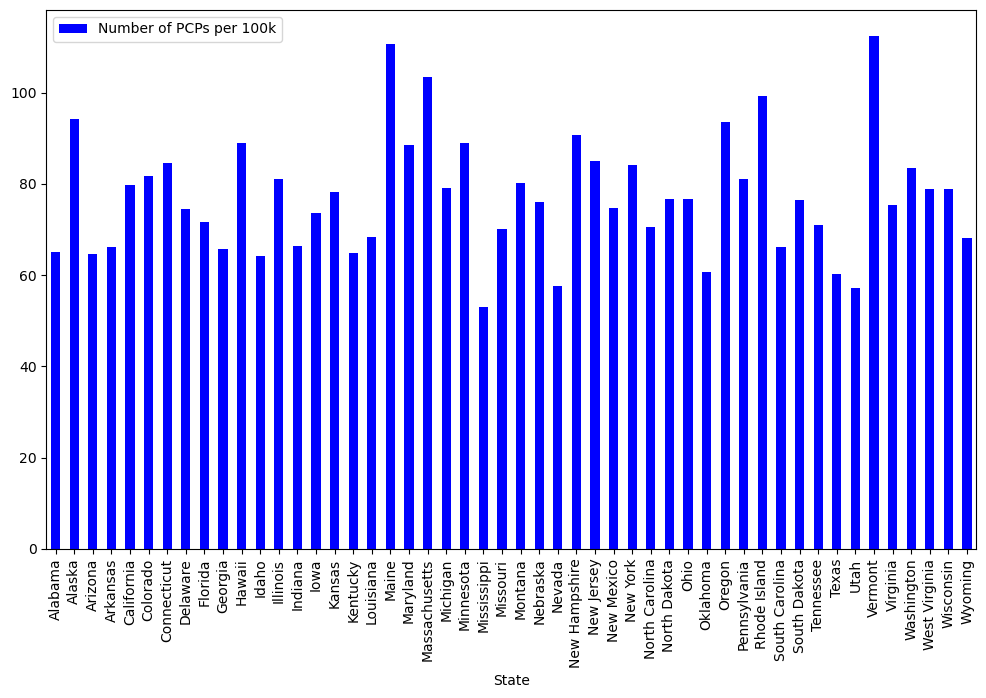

In [12]:
#compare all states population with internet services vs population of proviers not offering services 
figure1 = pcp_per_100k_df.plot(kind="bar", color=["blue"], figsize=(12,7))

#set up titles and lables
title =("Primary Care Physicians per 100K")
xlabel =("States")
ylabel =("Physicians")

#configure x tick
#xticklabels = int_pop_selection_df.index
#figure1.set_xticklabels(xticklabels, rotation=90, ha="right")
                                        
#shot plot
plt.show()

In [13]:
data_file_df




,Year,state,State_Pct_Telehealth,Rural_Pct_Telehealth,Urban_Pct_Telehealth,FID,fips,County Population,County Pop Per Sq Mile,Fixed Internet Subscribers,...,Number of PCPs per 100k,Number of Dentists per 100k,Number of Mental Health per 100k,Number of Adults in poor or Fair health,Rural Population,Share of Pop in Rural Area,Urban Population,Share of Pop in Urban Area,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
0,2023,Alabama,0.0713,0.0661,0.0732,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,1,4903185,96.80,75,...,65.00,49.89,108.30,1048095,2024944,41.3,2878241,58.7,16.5,7.9
1,2023,Alaska,0.1580,0.1682,0.1465,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,2,731545,1.28,80,...,94.32,102.25,499.63,113872,262036,35.8,469509,64.2,17.1,11.5
2,2023,Arizona,0.1549,0.1526,0.1553,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,4,7278717,64.08,85,...,64.68,63.03,140.19,1355532,922084,12.7,6356633,87.3,22.5,13.9
3,2023,Arkansas,0.1070,0.0906,0.1203,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,5,3017804,57.99,67,...,66.27,47.55,236.36,702297,1342675,44.5,1675129,55.5,14.5,6.8
4,2023,California,0.2743,0.2530,0.2768,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,6,39512223,253.64,89,...,79.87,87.02,373.39,6959513,2415048,6.1,37097175,93.9,12.4,5.8
5,2023,Colorado,0.1550,0.1419,0.1590,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,8,5758736,55.56,91,...,81.65,81.96,371.96,793887,923626,16.0,4835110,84.0,16.9,9.7
6,2023,Connecticut,0.1728,0.1615,0.1733,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,9,3565287,736.27,91,...,84.68,87.76,413.29,463181,432850,12.1,3132437,87.9,29.1,26.1
7,2023,Delaware,0.1638,0.1382,0.1763,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,10,973764,499.74,97,...,74.45,48.99,282.20,158408,175626,18.0,798138,82.0,36.4,28.4
8,2023,Florida,0.1254,0.1137,0.1259,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,12,21477737,400.51,94,...,71.62,60.77,169.02,4190642,2168495,10.1,19309242,89.9,22.7,15.0
9,2023,Georgia,0.1039,0.0847,0.1085,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,13,10617423,184.55,84,...,65.68,52.07,144.77,1955201,2620738,24.7,7996685,75.3,13.4,8.7


In [14]:
#sort dataframe by the State percentages for Telehealth
sort_tm_df = data_file_df.sort_values(by="State_Pct_Telehealth", ascending=False)

#select the top 10 values State Percent Telehealth
top_10_df = sort_tm_df.head(10)                                      
                                      


In [25]:
#print(top_10_df)

In [16]:
#Run the top 10 values of the State Percentage of Telehealth
top_10_df.head(10)


,Year,state,State_Pct_Telehealth,Rural_Pct_Telehealth,Urban_Pct_Telehealth,FID,fips,County Population,County Pop Per Sq Mile,Fixed Internet Subscribers,...,Number of PCPs per 100k,Number of Dentists per 100k,Number of Mental Health per 100k,Number of Adults in poor or Fair health,Rural Population,Share of Pop in Rural Area,Urban Population,Share of Pop in Urban Area,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
4,2023,California,0.2743,0.2530,0.2768,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,6,39512223,253.64,89,...,79.87,87.02,373.39,6959513,2415048,6.1,37097175,93.9,12.4,5.8
20,2023,Massachusetts,0.2390,0.2444,0.2388,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,25,6892503,883.65,92,...,103.49,107.51,654.04,931771,554141,8.0,6338362,92.0,31.1,27.9
10,2023,Hawaii,0.2107,0.1885,0.2205,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,15,1415872,220.45,101,...,88.99,90.05,260.83,218417,133503,9.4,1282369,90.6,13.6,4.1
31,2023,New York,0.1999,0.1718,0.2032,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,36,19453561,412.80,87,...,84.13,85.20,304.34,3161740,2345472,12.1,17108089,87.9,17.6,14.4
38,2023,Rhode Island,0.1873,0.1635,0.1874,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,44,1059361,1024.70,91,...,99.21,65.70,424.12,174896,98169,9.3,961192,90.7,30.0,25.3
22,2023,Minnesota,0.1868,0.1414,0.2135,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,27,5639632,70.82,83,...,89.05,74.74,267.18,727000,1510636,26.8,4128996,73.2,12.4,7.1
19,2023,Maryland,0.1794,0.1180,0.1832,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,24,6045680,622.80,90,...,88.53,79.41,274.87,917397,813910,13.5,5231770,86.5,33.2,29.5
6,2023,Connecticut,0.1728,0.1615,0.1733,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,9,3565287,736.27,91,...,84.68,87.76,413.29,463181,432850,12.1,3132437,87.9,29.1,26.1
28,2023,New Hampshire,0.1719,0.1664,0.1754,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,33,1359711,151.88,97,...,90.68,76.78,321.83,174652,541515,39.8,818196,60.2,35.6,32.6
44,2023,Vermont,0.1717,0.1741,0.1636,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,50,623989,67.70,94,...,112.50,73.24,480.94,79640,384260,61.6,239729,38.4,22.5,19.0


In [51]:
# put in a dataframe the  Bottome 10 values of the State Percentage of Telehealth
sort_tm_df = data_file_df.sort_values(by="State_Pct_Telehealth", ascending=False)

# Select the bottom 10 values for State Percent Telehealth
bottom_10_df = sort_tm_df.tail(10)

# Display the bottom 10 values
bottom_10_df.head(10)

,Year,state,State_Pct_Telehealth,Rural_Pct_Telehealth,Urban_Pct_Telehealth,FID,fips,County Population,County Pop Per Sq Mile,Fixed Internet Subscribers,...,Number of PCPs per 100k,Number of Dentists per 100k,Number of Mental Health per 100k,Number of Adults in poor or Fair health,Rural Population,Share of Pop in Rural Area,Urban Population,Share of Pop in Urban Area,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
11,2023,Idaho,0.0804,0.0776,0.0822,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,16,1787065,21.62,82,...,64.24,66.42,217.79,269951,567860,31.8,1219205,68.2,14.7,6.9
15,2023,Kansas,0.0801,0.0788,0.0813,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,20,2913314,35.63,80,...,78.23,60.21,204.58,474179,755429,25.9,2157885,74.1,12.3,5.6
41,2023,Tennessee,0.0771,0.0668,0.0821,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,47,6829174,165.61,79,...,71.00,55.51,157.69,1446144,2315707,33.9,4513467,66.1,26.4,19.4
40,2023,South Dakota,0.0770,0.0918,0.0527,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,46,884659,11.67,81,...,76.53,61.61,189.45,118949,399112,45.1,485547,54.9,8.5,4.1
26,2023,Nebraska,0.0738,0.0666,0.0809,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,31,1934408,25.18,81,...,76.15,78.63,276.31,266844,522234,27.0,1412174,73.0,7.5,3.1
33,2023,North Dakota,0.0720,0.0815,0.0594,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,38,762062,11.04,86,...,76.77,66.40,196.31,103893,344768,45.2,417294,54.8,10.0,5.7
0,2023,Alabama,0.0713,0.0661,0.0732,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,1,4903185,96.80,75,...,65.00,49.89,108.30,1048095,2024944,41.3,2878241,58.7,16.5,7.9
17,2023,Louisiana,0.0696,0.0625,0.0715,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,22,4648794,107.60,76,...,68.38,56.23,304.16,995947,1250495,26.9,3398299,73.1,23.8,9.2
14,2023,Iowa,0.0675,0.0700,0.0645,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,19,3155070,56.48,77,...,73.72,68.87,164.72,424747,1145601,36.3,2009469,63.7,10.7,5.8
23,2023,Mississippi,0.0604,0.0545,0.0685,Connect2Health_2023_state.fid-1c4f9cde_18cec2a...,28,2976149,63.39,66,...,53.09,48.75,169.11,656532,1512846,50.8,1463303,49.2,12.2,6.5


In [52]:
# #Top 10 states with # of PCP and Denstist per 100K 
# # Set the desired column names
desired_columns = [
     'state',
     'Number of PCPs per 100k',
     'Number of Dentists per 100k'
 ]

# # Filter the DataFrame based on the desired columns
top_10_PCP_den_df = top_10_df[desired_columns].copy()

# #set State columns as the index
top_10_PCP_den_df.set_index('state', inplace = True)

# # Display the resulting DataFrame
top_10_PCP_den_df.head()

,Number of PCPs per 100k,Number of Dentists per 100k
state,,
California,79.87,87.02
Massachusetts,103.49,107.51
Hawaii,88.99,90.05
New York,84.13,85.20
Rhode Island,99.21,65.70


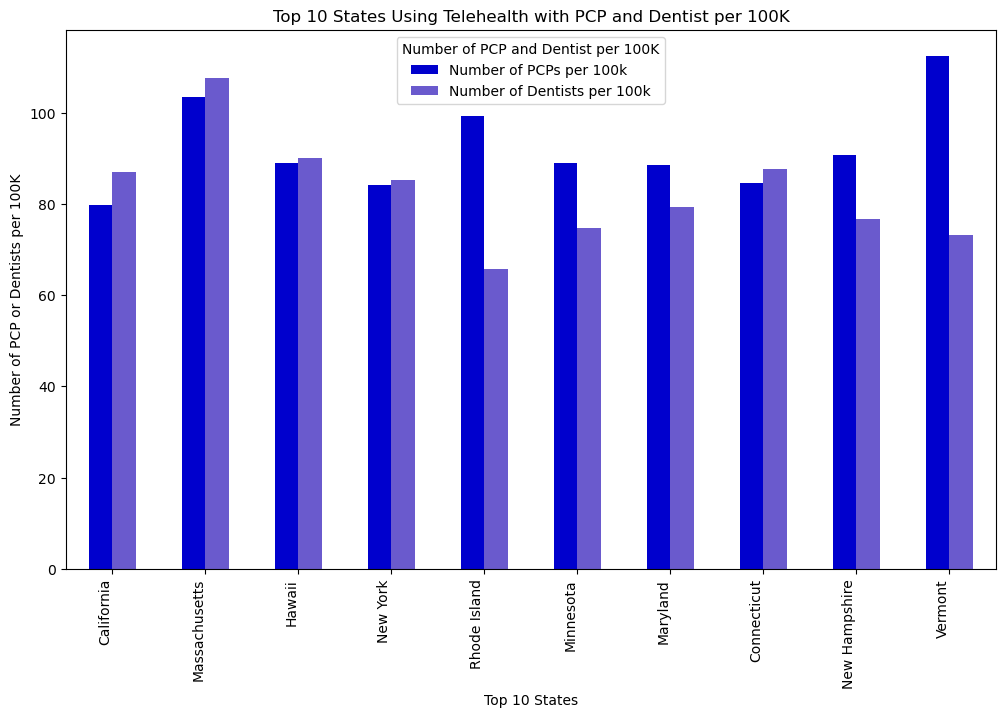

In [79]:
#Top 10 States with Telehealth usage with the number of Dentists and PCP per 100k
#compare all states population with internet services vs population of proviers not offering services 
figure1, ax = plt.subplots(figsize=(12,7))
top_10_PCP_den_df.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

#set up titles and lables
title =("Number of Primary Care Provider and Dentist per 100K")
xlabel =("States")
ylabel =("Primary Care Provder and Dentist")

#configure x tick
xticklabels = top_10_PCP_den_df.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")


ax.set_ylabel('Number of PCP or Dentists per 100K')
ax.set_xlabel('Top 10 States')
ax.set_title('Top 10 States Using Telehealth with PCP and Dentist per 100K')
ax.legend(title= 'Number of PCP and Dentist per 100K')
                                        
#shot plot
plt.show()

In [55]:
#Bottom 10 states with # of PCP and Denstist per 100K 
# Set the desired column names
desired_columns = [
    'state',
    'Number of PCPs per 100k',
    'Number of Dentists per 100k'
]

# Filter the DataFrame based on the desired columns
bottom_10_PCP_den_df = bottom_10_df[desired_columns].copy()

#set State columns as the index
bottom_10_PCP_den_df.set_index('state', inplace = True)

# Display the resulting DataFrame
bottom_10_PCP_den_df.head(10)

,Number of PCPs per 100k,Number of Dentists per 100k
state,,
Idaho,64.24,66.42
Kansas,78.23,60.21
Tennessee,71.00,55.51
South Dakota,76.53,61.61
Nebraska,76.15,78.63
North Dakota,76.77,66.40
Alabama,65.00,49.89
Louisiana,68.38,56.23
Iowa,73.72,68.87


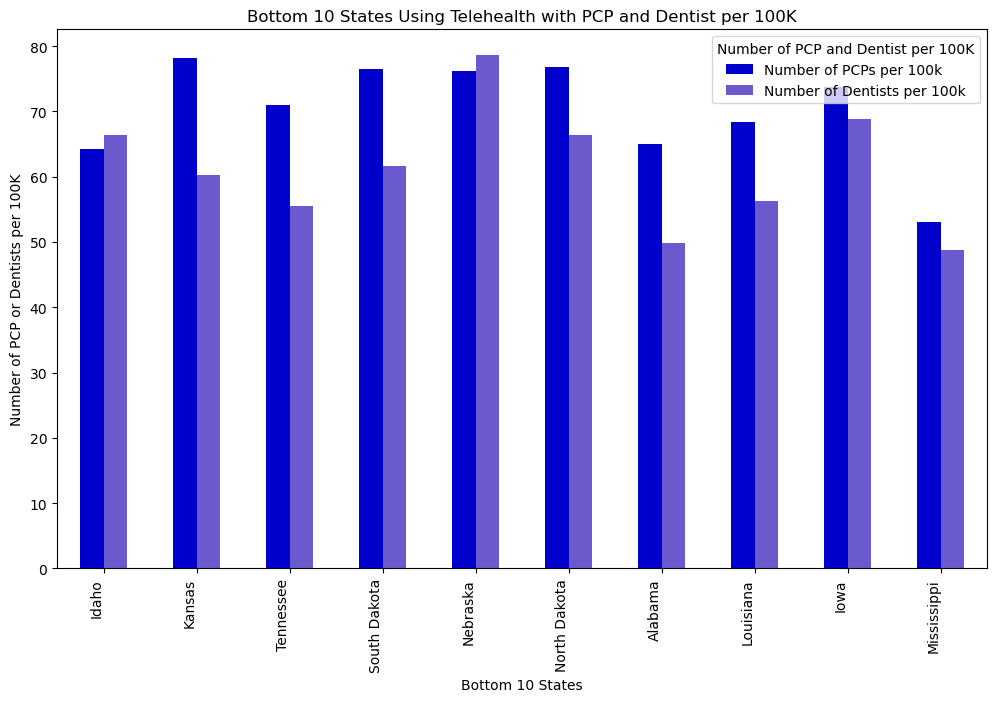

In [78]:
#Bottom 10 States with Telehealth usage with the number of Dentists and PCP per 100k
#compare all states population with internet services vs population of proviers not offering services 
figure1, ax = plt.subplots(figsize=(12,7))
bottom_10_PCP_den_df.plot(kind="bar", ax=ax, color=["mediumblue", "slateblue"])

#set up titles and lables
title =("Number of Primary Care Provider and Dentist per 100K")
xlabel =("States")
ylabel =("Primary Care Provder and Dentist")

#configure x tick
xticklabels = bottom_10_PCP_den_df.index
ax.set_xticklabels(xticklabels, rotation=90, ha="right")


ax.set_ylabel('Number of PCP or Dentists per 100K')
ax.set_xlabel('Bottom 10 States')
ax.set_title('Bottom 10 States Using Telehealth with PCP and Dentist per 100K')
ax.legend(title = 'Number of PCP and Dentist per 100K')
                                        
#shot plot
plt.show()

In [59]:
# #Top 10 states with # of PCP and Denstist per 100K 
# # Set the desired column names
desired_columns = [
     'state',
     'Number of Drug Related Deaths per 100k',
     'Number of Opiod Related Deaths per 100k'
 ]

# # Filter the DataFrame based on the desired columns
top_10_drug_deaths_df = top_10_df[desired_columns].copy()

# #set State columns as the index
top_10_drug_deaths_df.set_index('state', inplace = True)

# # Display the resulting DataFrame
top_10_drug_deaths_df.head(10)

,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
state,,
California,12.4,5.8
Massachusetts,31.1,27.9
Hawaii,13.6,4.1
New York,17.6,14.4
Rhode Island,30.0,25.3
Minnesota,12.4,7.1
Maryland,33.2,29.5
Connecticut,29.1,26.1
New Hampshire,35.6,32.6


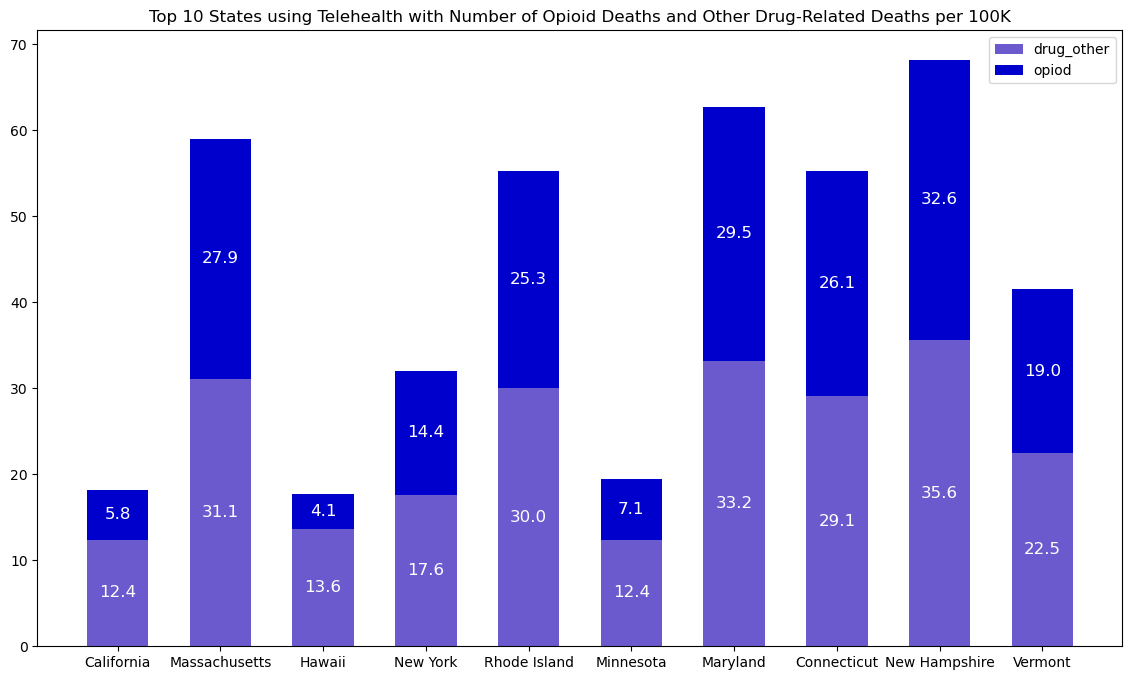

In [72]:
# Top 10 states with Nuomber of Opiod and other Drug related deaths per 100K

# States and drugs and Opiod
states = ['California', 'Massachusetts', 'Hawaii', 'New York', 'Rhode Island', 'Minnesota', 'Maryland', 'Connecticut', 'New Hampshire', 'Vermont']
drug_deaths = {
    'drug_other': np.array([12.4, 31.1, 13.6, 17.6, 30.0, 12.4, 33.2, 29.1, 35.6, 22.5]),
    'opiod': np.array([5.8, 27.9, 4.1, 14.4, 25.3, 7.1, 29.5, 26.1, 32.6, 19.0]),
}

width = 0.6 

fig, ax = plt.subplots(figsize=(14,8))
bottom = np.zeros(len(states))  

#Specify colors
drug_colors = {'drug_other': 'slateblue', 'opiod': 'mediumblue'}

for drug, deaths in drug_deaths.items():
    p = ax.bar(states, deaths, width, label=drug, bottom=bottom, color=drug_colors[drug])
    bottom += deaths  

    ax.bar_label(p, labels=deaths, label_type='center', color='white', fontsize=12)  

ax.set_title('Top 10 States using Telehealth with Number of Opioid Deaths and Other Drug-Related Deaths per 100K')
ax.legend()

plt.show()

In [73]:
#Bottom 10 states with # of Opiod and other related Drug deaths per 100k
# Set the desired column names
desired_columns = [
    'state',
    'Number of Drug Related Deaths per 100k',
    'Number of Opiod Related Deaths per 100k'
]

# Filter the DataFrame based on the desired columns
bottom_10_drug_deaths = bottom_10_df[desired_columns].copy()

#set State columns as the index
bottom_10_drug_deaths.set_index('state', inplace = True)

# Display the resulting DataFrame
bottom_10_drug_deaths.head(10)

,Number of Drug Related Deaths per 100k,Number of Opiod Related Deaths per 100k
state,,
Idaho,14.7,6.9
Kansas,12.3,5.6
Tennessee,26.4,19.4
South Dakota,8.5,4.1
Nebraska,7.5,3.1
North Dakota,10.0,5.7
Alabama,16.5,7.9
Louisiana,23.8,9.2
Iowa,10.7,5.8


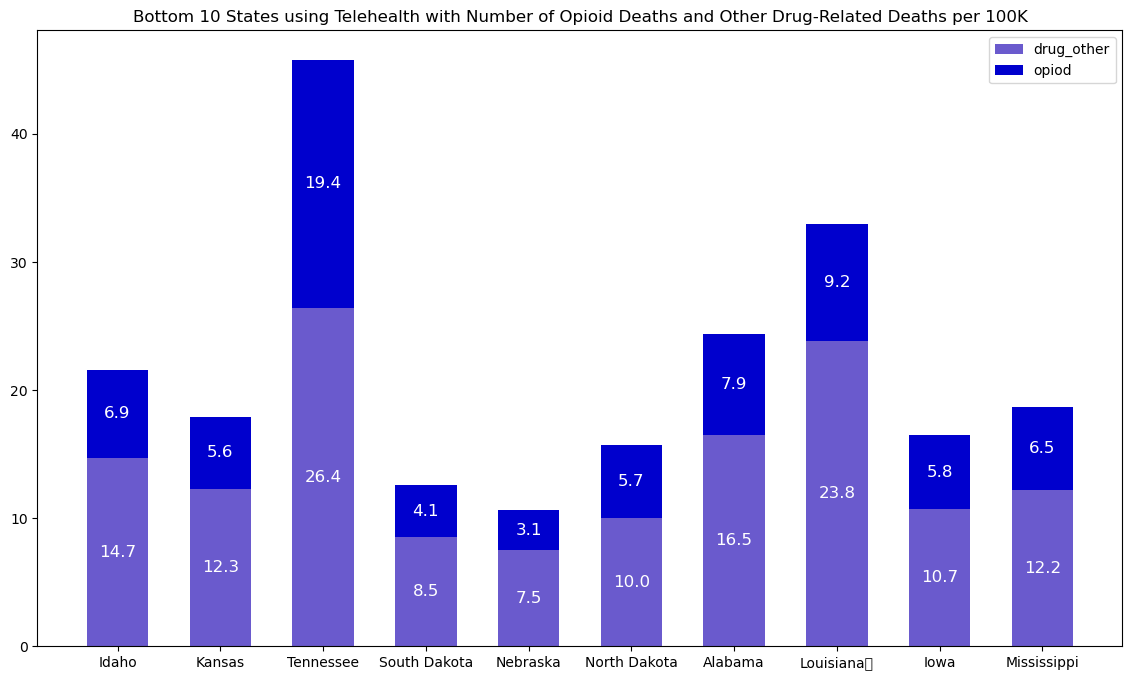

In [74]:
#Bottom 10 states with Nuomber of Opiod and other Drug related deaths per 100K

# States and drugs and Opiod
states = ['Idaho', 'Kansas', 'Tennessee', 'South Dakota', 'Nebraska', 'North Dakota', 'Alabama', 'Louisiana	', 'Iowa', 'Mississippi']
drug_deaths = {
    'drug_other': np.array([14.7, 12.3, 26.4, 8.5, 7.5, 10.0, 16.5, 23.8, 10.7, 12.2]),
    'opiod': np.array([6.9, 5.6, 19.4, 4.1, 3.1, 5.7, 7.9, 9.2, 5.8, 6.5]),
}

width = 0.6 

fig, ax = plt.subplots(figsize=(14,8))
bottom = np.zeros(len(states))  

#Specify colors
drug_colors = {'drug_other': 'slateblue', 'opiod': 'mediumblue'}

for drug, deaths in drug_deaths.items():
    p = ax.bar(states, deaths, width, label=drug, bottom=bottom, color=drug_colors[drug])
    bottom += deaths  

    ax.bar_label(p, labels=deaths, label_type='center', color='white', fontsize=12)  

ax.set_title('Bottom 10 States using Telehealth with Number of Opioid Deaths and Other Drug-Related Deaths per 100K')
ax.legend()

plt.show()

In [80]:
# #Top 10 states with #  
# # Set the desired column names
desired_columns = [
     'state',
     'Number of Adults in poor or Fair health',
 ]

# # Filter the DataFrame based on the desired columns
top_10_poor_health_df = top_10_df[desired_columns].copy()

# #set State columns as the index
top_10_poor_health_df.set_index('state', inplace = True)

# # Display the resulting DataFrame
top_10_poor_health_df.head(10)

,Number of Adults in poor or Fair health
state,
California,6959513
Massachusetts,931771
Hawaii,218417
New York,3161740
Rhode Island,174896
Minnesota,727000
Maryland,917397
Connecticut,463181
New Hampshire,174652


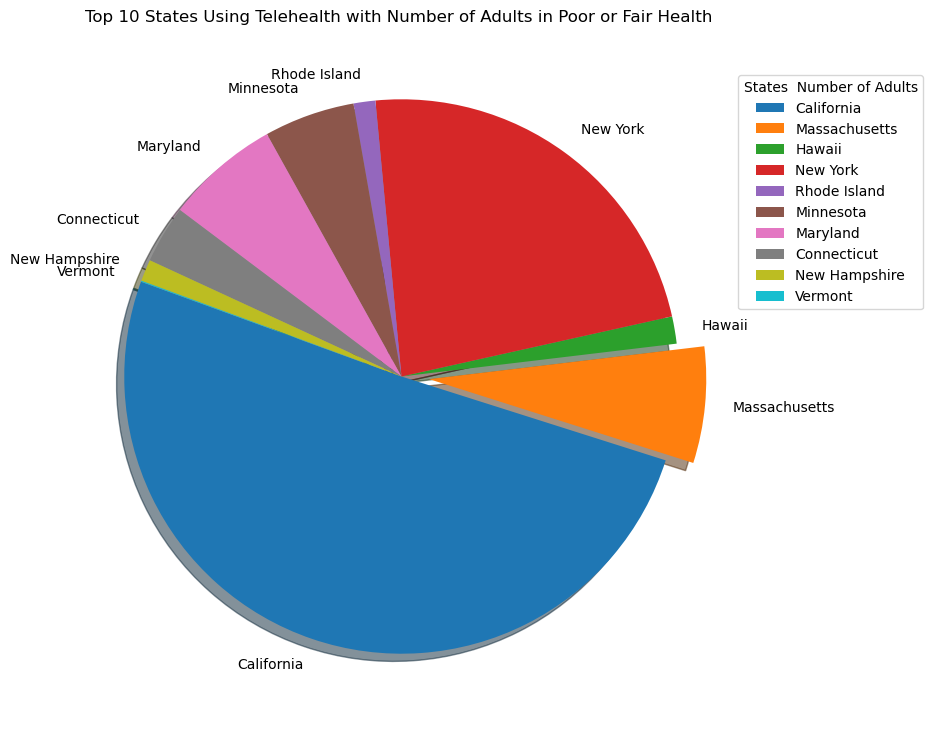

In [121]:
#Pie Chart with top 10 states using TH with poor or fair health
import matplotlib.pyplot as plt

labels = 'California', 'Massachusetts', 'Hawaii', 'New York', 'Rhode Island', 'Minnesota', 'Maryland', 'Connecticut', 'New Hampshire', 'Vermont'
sizes = [6959513, 931771, 218417, 3161740, 174896, 727000, 917397, 463181, 174652, 7964]


explode = [0 if i !=1 else 0.1 for i in range(len(labels))]  

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=160)
ax.legend(labels, title="States  Number of Adults", bbox_to_anchor=(1.1, 0.7), loc="center right", bbox_transform=plt.gcf().transFigure)
ax.set_title("Top 10 States Using Telehealth with Number of Adults in Poor or Fair Health ")
plt.show()



In [101]:
#Bottom 10 states with usage of Telehealth with Fair or Poor Health 
# Set the desired column names
desired_columns = [
    'state',
    'Number of Adults in poor or Fair health'
]

# Filter the DataFrame based on the desired columns
bottom_10_poor_health_df = bottom_10_df[desired_columns].copy()

#set State columns as the index
bottom_10_poor_health_df .set_index('state', inplace = True)

# Display the resulting DataFrame
bottom_10_poor_health_df .head(10)

,Number of Adults in poor or Fair health
state,
Idaho,269951
Kansas,474179
Tennessee,1446144
South Dakota,118949
Nebraska,266844
North Dakota,103893
Alabama,1048095
Louisiana,995947
Iowa,424747


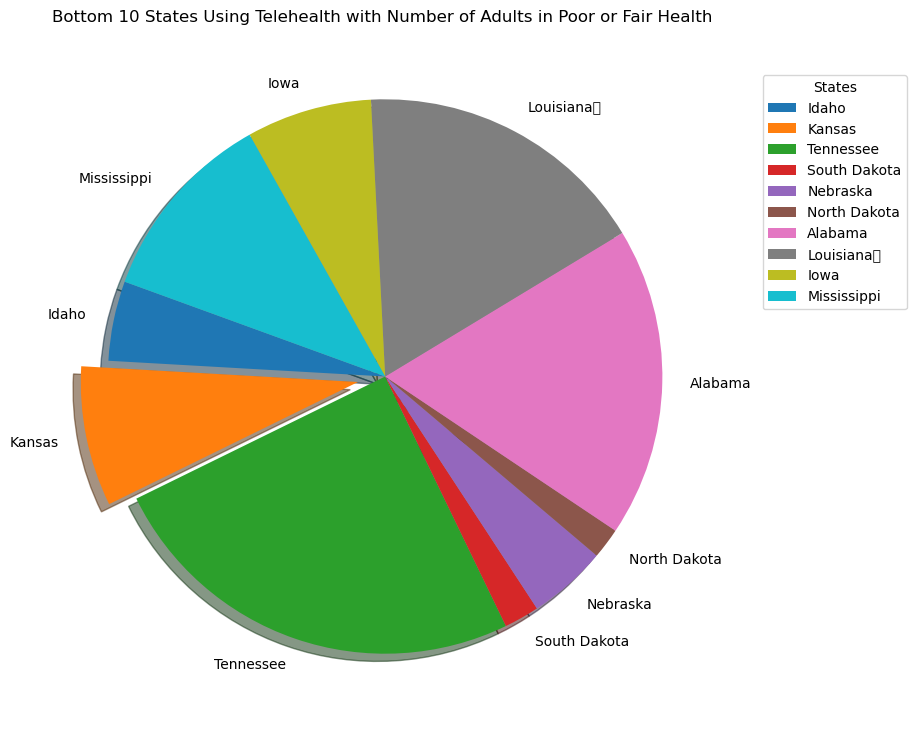

In [120]:
#Pie Chart with bottom 10 states using TH with poor or fair health
import matplotlib.pyplot as plt

labels = 'Idaho', 'Kansas', 'Tennessee', 'South Dakota', 'Nebraska', 'North Dakota', 'Alabama', 'Louisiana	', 'Iowa', 'Mississippi'
sizes = [269951, 474179, 1446144, 118949, 266844, 103893, 1048095, 995947, 424747, 656532]


explode = [0 if i !=1 else 0.1 for i in range(len(labels))]  

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=160)
ax.legend(labels, title="States", bbox_to_anchor=(1.1, 0.7), loc="center right", bbox_transform=plt.gcf().transFigure)
ax.set_title("Bottom 10 States Using Telehealth with Number of Adults in Poor or Fair Health ")
plt.show()

In [106]:
# #Top 10 states with number of Mental Health Per 100K
# # Set the desired column names
desired_columns = [
     'state',
     'Number of Mental Health per 100k'
 ]

# # Filter the DataFrame based on the desired columns
top_10_mental_helath_df = top_10_df[desired_columns].copy()

# #set State columns as the index
top_10_mental_helath_df.set_index('state', inplace = True)

# # Display the resulting DataFrame
top_10_mental_helath_df.head(10)

,Number of Mental Health per 100k
state,
California,373.39
Massachusetts,654.04
Hawaii,260.83
New York,304.34
Rhode Island,424.12
Minnesota,267.18
Maryland,274.87
Connecticut,413.29
New Hampshire,321.83


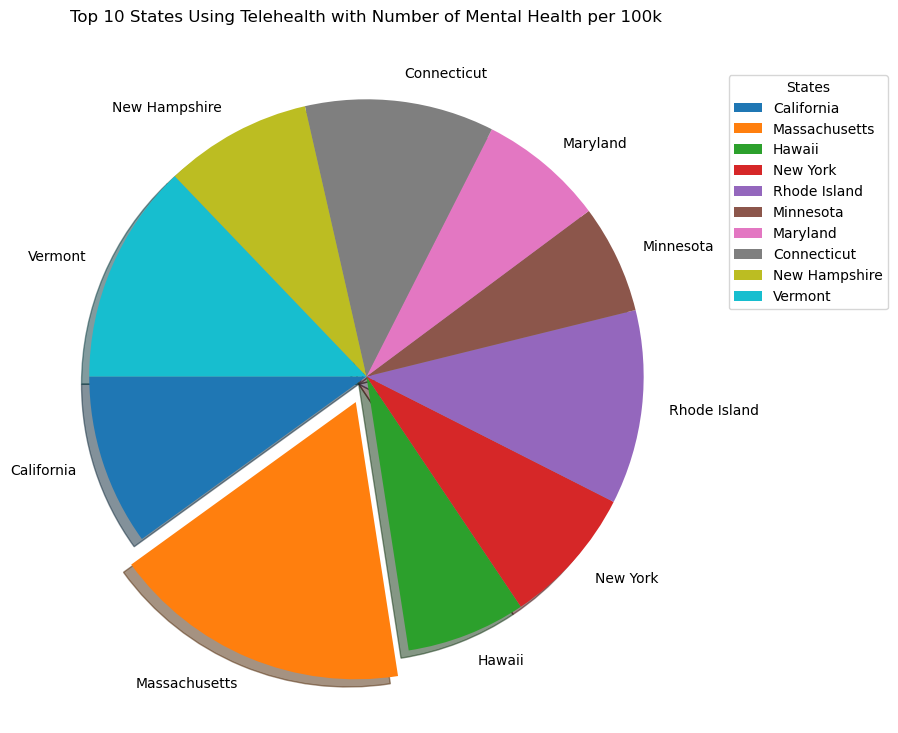

In [119]:
#Pie Chart with top 10 states using TH with poor or fair health
import matplotlib.pyplot as plt

labels = 'California', 'Massachusetts', 'Hawaii', 'New York', 'Rhode Island', 'Minnesota', 'Maryland', 'Connecticut', 'New Hampshire', 'Vermont'
sizes = [373.39, 654.04, 260.83,304.34, 424.12, 237.18, 274.87, 413.29, 321.83, 480.94]


explode = [0 if i !=1 else 0.1 for i in range(len(labels))]  

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=180)
ax.legend(labels, title="States", bbox_to_anchor=(1.1, 0.7), loc="center right", bbox_transform=plt.gcf().transFigure)
ax.set_title("Top 10 States Using Telehealth with Number of Mental Health per 100k")
plt.show()

In [108]:
#Bottom 10 states with number of Mental Health Per 100K
# Set the desired column names
desired_columns = [
    'state',
    'Number of Mental Health per 100k'
] 

# Filter the DataFrame based on the desired columns
bottom_mental_health = bottom_10_df[desired_columns].copy()

#set State columns as the index
bottom_mental_health.set_index('state', inplace = True)

# Display the resulting DataFrame
bottom_mental_health.head(10)

,Number of Mental Health per 100k
state,
Idaho,217.79
Kansas,204.58
Tennessee,157.69
South Dakota,189.45
Nebraska,276.31
North Dakota,196.31
Alabama,108.30
Louisiana,304.16
Iowa,164.72


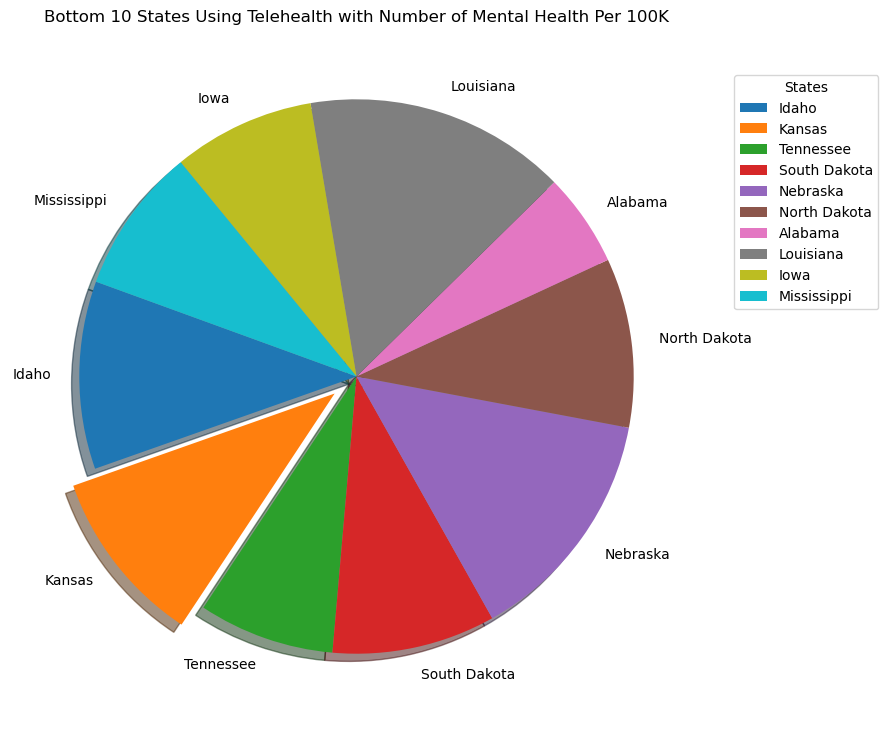

In [118]:
#Pie Chart with bottom 10 states number of Mental Health Per 100K
import matplotlib.pyplot as plt

labels = 'Idaho', 'Kansas', 'Tennessee', 'South Dakota', 'Nebraska', 'North Dakota', 'Alabama', 'Louisiana', 'Iowa', 'Mississippi'
sizes = [217.79, 204.58, 157.69, 189.45, 276.31, 196.31,108.30, 304.16, 164.72,169.11]


explode = [0 if i !=1 else 0.1 for i in range(len(labels))]  

fig, ax = plt.subplots(figsize=(9, 9))
ax.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=160)
ax.legend(labels, title="States", bbox_to_anchor=(1.1, 0.7), loc="center right", bbox_transform=plt.gcf().transFigure)
ax.set_title("Bottom 10 States Using Telehealth with Number of Mental Health Per 100K")
plt.show()